## Variant of the Interactive Race Model that includes some trials with 0 mustop and lower per step variability 

In [1]:
import numpy
import random
import matplotlib.pyplot as plt
import pandas

%matplotlib inline

In [4]:
params={'mugo':.2,
#        'mustop':.8, 
        'mustopstrong':.8,
        'mustopweak':0,
        'threshold':60,
        'nondecisiongo':50,
        'nondecisionstop':50,
        'inhibitionParam':1, 
        'ssds':[1,50,100,150, 200,250, 300, 350, 400, 450, 500,3000],
        'nreps':5000,
        'maxtime':1000,
        'proportionweak':.15}

def interactiverace(params):
    stopaccumsave = []
    mustopsave = []
    stopsave = []
    meanrtgo = numpy.zeros(len(params['ssds']))
    presp = numpy.zeros(len(params['ssds']));
 
    for irep in range(params['nreps']):
        for j,ssd in enumerate(params['ssds']):
            stopsignaldelay = ssd
            goaccumulator = 0
            stopaccumulator = 0
            rtgo = 0
            itime = 0
            if random.uniform(0,1) < params['proportionweak']:
                mustop = params['mustopweak']
            else: 
                mustop = params['mustopstrong']
#            while mustop<=0:
#                mustop = params['mustop']+numpy.random.normal(loc=0, scale=1) 
            mustopsave.append(mustop)
            while itime < params['maxtime'] and rtgo == 0: # single trial
                itime = itime + 1
                if itime < stopsignaldelay + params['nondecisionstop']:
                    inhibition = 0
                else:
                    inhibition = params['inhibitionParam']
                    if mustop == params['mustopweak']:
                        stopaccumulator = stopaccumulator + mustop + numpy.random.normal(loc=0, scale=.008)
                        stopsave.append(stopaccumulator)
                    else: 
                        stopaccumulator = stopaccumulator + mustop + numpy.random.normal(loc=0, scale=1)
                    if stopaccumulator <= 0:
                        stopaccumulator = 0;
                    stopaccumsave.append(stopaccumulator)
                if itime >= params['nondecisiongo']:
                    goaccumulator = goaccumulator + params['mugo'] - inhibition*stopaccumulator + numpy.random.normal(loc=0, scale=1)
                    if goaccumulator <= 0:
                        goaccumulator = 0;
                if goaccumulator > params['threshold']:
                    if rtgo == 0:
                        rtgo = itime;
            meanrtgo[j] += rtgo;
            if rtgo > 0:
                presp[j] += 1;

    for ssd in range(len(params['ssds'])):
        if presp[ssd] > 0:
            meanrtgo[ssd] = meanrtgo[ssd]/presp[ssd];
        presp[ssd] = presp[ssd]/params['nreps'];
    return(meanrtgo,presp,mustopsave,stopaccumsave)

meanrtgo,presp,mustopsave,stopaccumsave=interactiverace(params)
print(meanrtgo)
print(presp)
#print(stopaccumsave)
#print(mustopsave)

[461.85568761 439.45409836 414.33591331 368.6437414  316.2810189
 293.39915966 301.79580675 316.96038151 326.91793179 331.7172471
 337.30089395 342.7062    ]
[0.1178 0.122  0.1292 0.1454 0.2434 0.4284 0.6582 0.8178 0.909  0.9648
 0.9844 1.    ]


[1, 500, 0, 1]

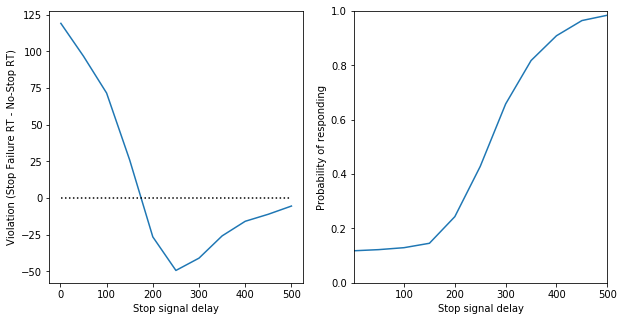

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(params['ssds'][:11],meanrtgo[:11] - meanrtgo[11])
plt.plot([params['ssds'][0],params['ssds'][10]],[0,0],'k:')
plt.xlabel('Stop signal delay')
plt.ylabel('Violation (Stop Failure RT - No-Stop RT)')
plt.subplot(1,2,2)
plt.plot(params['ssds'][:11],presp[:11])
plt.xlabel('Stop signal delay')
plt.ylabel('Probability of responding')
plt.axis([params['ssds'][0],params['ssds'][10],0,1])
